In [1]:
# Introduction to Artificial Neural Networks with Keras

# First we will look at the MLP architecture
# Secondly we will see how to implement an ANN using keras API

# ANN's work better than most other methods on extremely large data sets
# They hardly ever get stuck in local optima
# Neural networks are where the money is as they sound cool to general public.

# ANN's are simple in idea but with vast data and large amounts of "neurons" we create extremely complex systems
# (just like Wolfram Physics)

# Lets try what is called perceptron learning using sckit - learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([1])

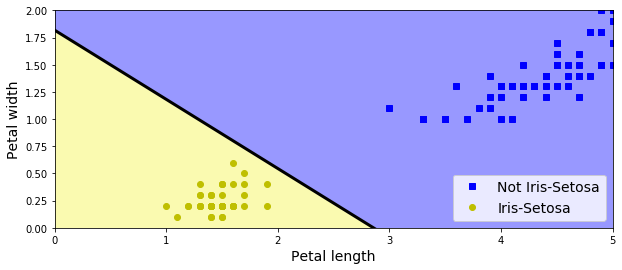

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [4]:
# The main weakness of perceptrons is that they struggle to solve simple probelms
# The solution was the creation of "hidden layers", or repeating the process of perceptrons more than once

In [5]:
# Multilayer Perceptron and Backpropagation


# A MLP is composed of one input layer. one or more layers of TLU's known as hidden layers and finally another
# TLU layer that is the output layer. (layers close to input = lower layer, close to output = upper layers)
# every layer accept the output has what is known as a bias neuron and is fully connected to the next layer
# When a ANN contains many hidden layers then this is called deep learning. (neural networks approx= deep learning)

In [6]:
# There was trouble originally training ANN's until backpropagation was purposed. It is gradient decent using
# an eficient technique for computing the gradients automatically. Once it has the grads it can perform normal 
# grad decent and repeat until we have a solution the model converges to.

In [7]:
# Activation Functions:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

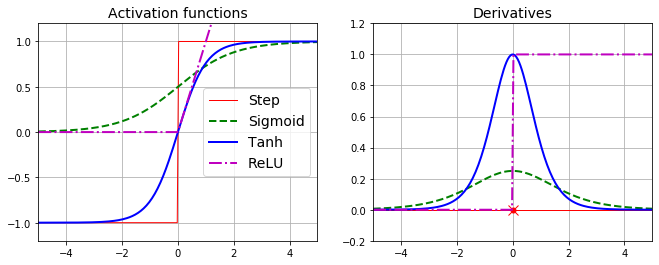

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [9]:
# MNIST Classification using the estimator API

import tensorflow as tf
from tensorflow import keras

In [10]:
# in this section we will tackle the fashion MNIST whihc is a drop in replacement for MNIST. Instead of numbers,
# the images represent fashion items, each class is more diverse by significantly harder.

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [13]:
class_names = ["Top", "Trousers", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Trainers", "Bag", "Boots"]

In [14]:
class_names[y_train[0]]

'Coat'

In [40]:
# Creating a model using the Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
# Goinging through the code line by line above

# makes a sequential model (simplest keras model)
# input layer, preprocessing our input with reshape
# hidden layer, 300 neurons. Uses the ReLU activation function
# hidden layer, 100 neurons. Uses ReLU
# Output, 10 neurons, 1 per class using the softmax activation fuction

In [16]:
# Adding each layer one by one as we just did is time consuming and boring
# We can instead pass a list of layers when creating the Sequential Model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Dense layers have a lot of parameters, this could lead to overfitting, especially wiht not much trainging data.
# We will come back to this later

model.layers

In [19]:
hidden1 = model.layers[1]

In [20]:
hidden1.name

'dense'

In [21]:
model.get_layer('dense') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[ 0.04040064, -0.02291225,  0.01174735, ...,  0.02074113,
        -0.03952088,  0.04853158],
       [ 0.04824992, -0.00953738, -0.02602603, ..., -0.02050753,
         0.00164326,  0.05297916],
       [-0.06688707, -0.07120288, -0.01709865, ..., -0.05838411,
         0.02887952,  0.02464645],
       ...,
       [ 0.00222515,  0.00777996, -0.0191484 , ...,  0.01507459,
        -0.02367097, -0.05621997],
       [ 0.05206098,  0.01157372,  0.00462956, ...,  0.01735475,
         0.06829506,  0.01967683],
       [-0.01262295, -0.04636467,  0.07259734, ...,  0.0027817 ,
         0.05813682,  0.01473446]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
# Weights are randomly connected to break symmetry
# Biases are intialised at zero
# We canuse different init methods by setting kernel_initializer or bias_initializer (chapter 11)

In [29]:
# Compliling a Model

# Once created, we must compile a model, we can specify extra metrics to compute during training:

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [30]:
# Training and Evaluation of the Model

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9748 - accuracy: 0.6912 - val_loss: 0.4861 - val_accuracy: 0.8386
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4986 - accuracy: 0.8263 - val_loss: 0.4816 - val_accuracy: 0.8242
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4476 - accuracy: 0.8429 - val_loss: 0.4170 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.8545 - val_loss: 0.3852 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.8617 - val_loss: 0.3814 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3733 - accuracy: 0.8672 - val_loss: 0.3909 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3642 - accuracy: 0.8708 - val_loss: 0.3717 - val_accuracy: